Importing the Libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [19]:
# loading the csv data to a Pandas DataFrane
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [20]:
# print first 5 rows in the DataFrame
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [21]:
# print last 5 rows of the DataFrame
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [22]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [23]:
# getting some basic information abot the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [24]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [25]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation

1. Positive Correlation
2. Negative Correlation

In [26]:
gold_data = gold_data.drop(['Date'], axis=1)
correlation = gold_data.corr()

<Axes: >

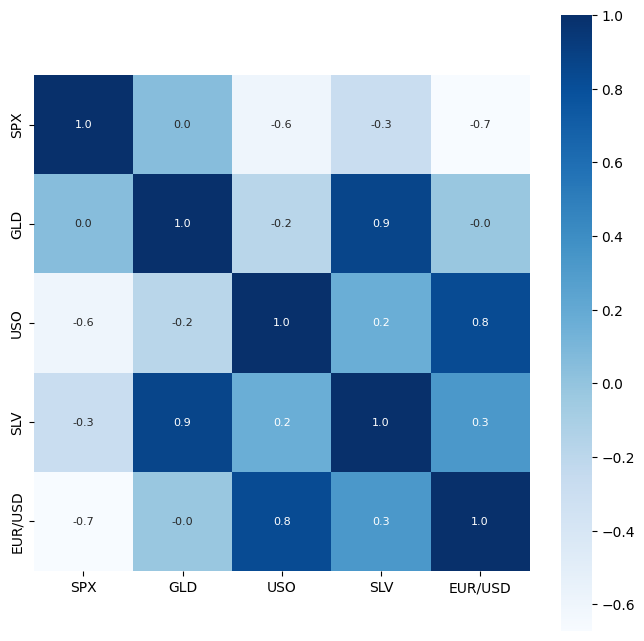

In [30]:
# constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [31]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-32-e5990a2b2347>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

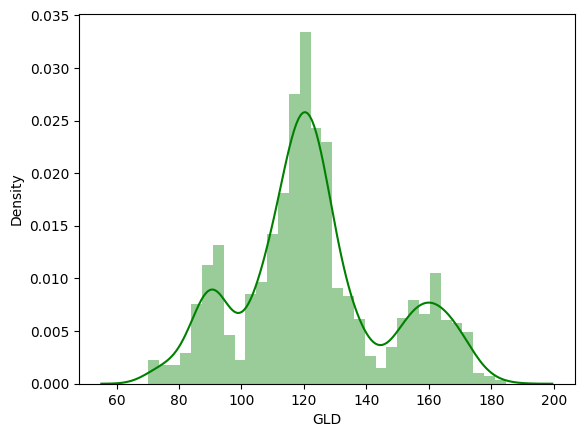

In [32]:
# checking the distribution of the GLD price
sns.distplot(gold_data['GLD'], color='green')

Splitting the Features and Target

In [33]:
X = gold_data.drop(['GLD'], axis=1)
Y = gold_data['GLD']

In [34]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [35]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training and Test Data

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


Model Training:

Random Forest Regression

In [38]:
regressor = RandomForestRegressor(n_estimators=100)

In [39]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [40]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [41]:
print(test_data_prediction)

[168.48609928  82.09939989 116.05370013 127.57360068 120.64000134
 154.70709759 150.34809854 125.9982005  117.26049872 125.9174011
 116.70890117 171.87890075 141.72909869 167.77339883 115.26170028
 117.83530035 140.34590244 170.27500098 159.24260193 161.5606994
 155.14020017 125.38189946 176.25169962 157.25880433 125.19490041
  93.87799979  76.90310019 120.67230027 119.1408997  167.43689927
  88.43340076 125.32840006  91.22930081 117.69790035 121.15989898
 136.56510151 115.47300099 115.16180088 148.28609956 107.13740081
 104.68430241  87.15789816 126.52490042 118.08850028 153.19689895
 119.50210021 108.38749982 108.04479861  93.25030089 126.97029839
  74.90800024 113.64849987 121.48609985 111.25669883 118.95459891
 120.7119996  159.41110008 166.78570146 146.99879649  85.83449883
  94.33830054  86.85179907  90.46109986 118.88620082 126.4349003
 127.60580021 170.61510047 122.22199922 117.24529891  98.56650031
 168.57450096 143.37269857 131.37060257 121.31080224 120.62299961
 119.70560077

In [44]:
# R sqaured error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R sqaured error: ', error_score)

R sqaured error:  0.9894192330948555


Compare the Actual and Predicted Values in a Plot

In [45]:
Y_test = list(Y_test)

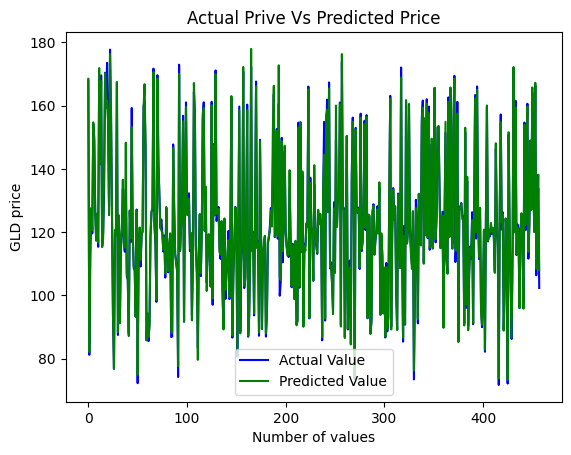

In [50]:
plt.plot(Y_test, color='Blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Prive Vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()

The blue line is beneath and nearly hidden within the green line, indicating that the predictions are almost entirely accurate.